In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy

In [2]:
abspath = os.getcwd()
abspath = os.path.join(abspath.split("af-ranking-confidence")[0],"af-ranking-confidence")

In [3]:
#model_dir="DeepGCN_AFRankingDataset_n-1_ngpu2_DockQ"
#model_dir="DeepGCN_AFRankingDataset_n0_ngpu2_bs16_lr0.01_DockQ"
model_dir="DeepGCN_AFRankingDataset_n0_ngpu2_bs32_lr0.01_wd0_mdr0.1_ml1_mhc8_mdrGCN0.1_DockQ"
scores_path = os.path.join(abspath,f"gnn_data/checkpoints/{model_dir}/evaluation",f"eval.csv")
df = pd.read_csv(scores_path, sep=',')

#Add random column
df['random_values'] = np.random.rand(len(df))


print(df.keys())

Index(['PDBID', 'identifier', 'DockQ', 'ptm', 'iptm', 'ranking_confidence',
       'prediction', 'random_values'],
      dtype='object')


# Plot

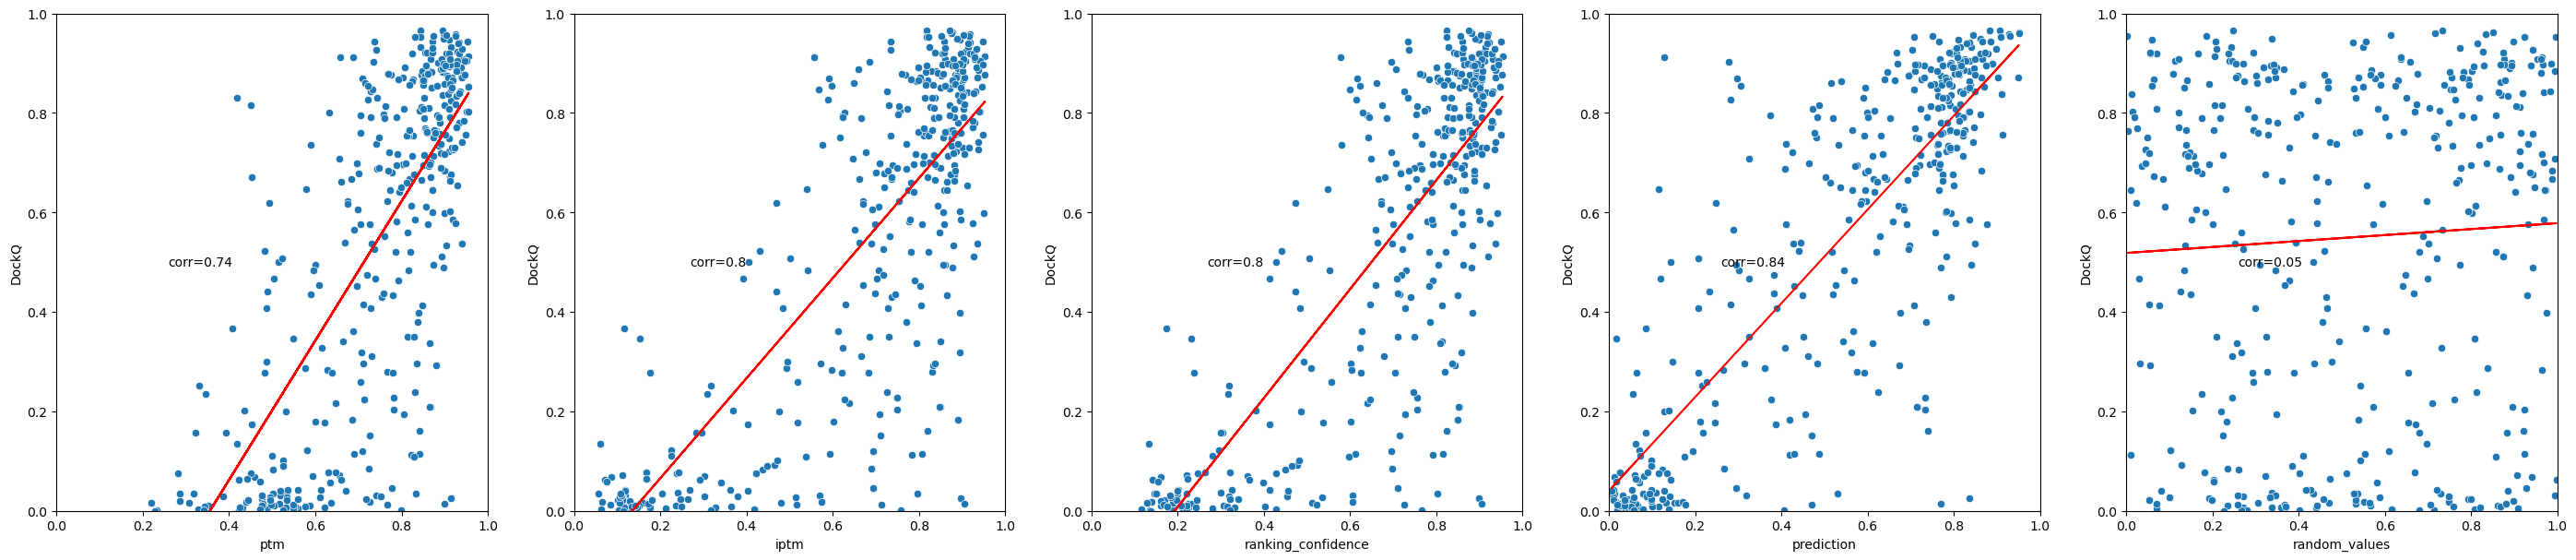

In [4]:

flags = ['ptm', 'iptm', 'ranking_confidence', 'prediction', 'random_values']


corr_df = df.corr(method='pearson', numeric_only=True)

n_x_axis = len(flags)
y_axis = 'DockQ'
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*7, 1*7))
for i in range(n_x_axis):
    curr_ax = axes[i]
    sns.scatterplot(ax=curr_ax, data=df,x=flags[i],y=y_axis)
    curr_ax.set_xlim(0,1)
    curr_ax.set_ylim(0,1)

    slope, intercept, rval, pval, se = scipy.stats.linregress(df[flags[i]],df[y_axis])
    curr_ax.plot(df[flags[i]], intercept + slope*df[flags[i]], 'r', label='fitted line')
    curr_ax.text(1/3, 0.5, f'corr={round(rval,2)}', horizontalalignment='center', verticalalignment='center')




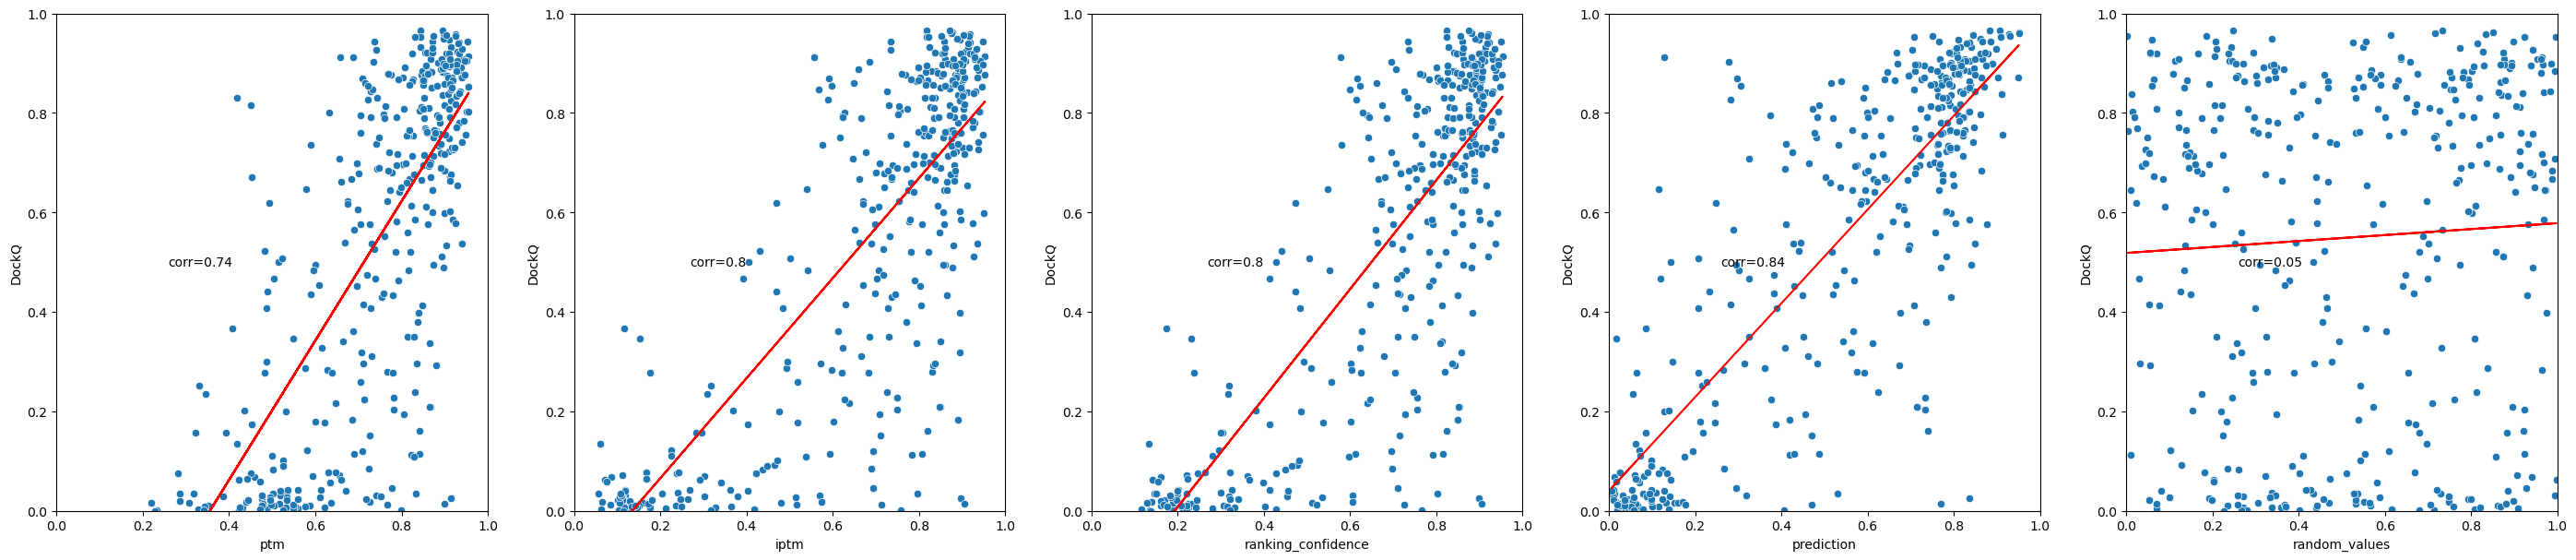

In [5]:
flags = ['ptm', 'iptm', 'ranking_confidence', 'prediction','random_values']


corr_df = df.corr(method='spearman', numeric_only=True)

n_x_axis = len(flags)
y_axis = 'DockQ'
fig, axes = plt.subplots(1, n_x_axis, figsize=(n_x_axis*7, 1*7))
for i in range(n_x_axis):
    curr_ax = axes[i]
    sns.scatterplot(ax=curr_ax, data=df,x=flags[i],y=y_axis)
    curr_ax.set_xlim(0,1)
    curr_ax.set_ylim(0,1)

    slope, intercept, rval, pval, se = scipy.stats.linregress(df[flags[i]],df[y_axis])
    curr_ax.plot(df[flags[i]], intercept + slope*df[flags[i]], 'r', label='fitted line')
    curr_ax.text(1/3, 0.5, f'corr={round(rval,2)}', horizontalalignment='center', verticalalignment='center')



# Correlation

In [6]:

# Define flags
flags = list(df.columns)
flags.remove("PDBID")
flags.remove("identifier")

# Calculate Correlation
corr_pearson = df.corr(method="pearson",numeric_only=True)["DockQ"]
corr_spearman = df.corr(method="spearman",numeric_only=True)["DockQ"]

df_pearson = corr_pearson.to_frame()
df_pearson = df_pearson.rename(columns = {'DockQ':'DockQ_pearson'})

df_spearman = corr_spearman.to_frame()
df_spearman = df_spearman.rename(columns = {'DockQ':'DockQ_spearman'})

df_results = df_pearson.join(df_spearman)

df_results.sort_values(by=["DockQ_pearson"],ascending=False)

,DockQ_pearson,DockQ_spearman
DockQ,1.000000,1.000000
prediction,0.838240,0.796948
ranking_confidence,0.799279,0.733871
iptm,0.797417,0.725893
ptm,0.737190,0.712397
random_values,0.053185,0.057927


# Norms

In [7]:


df_diff = df[['DockQ','ptm', 'iptm', 'ranking_confidence', 'prediction','random_values']].sub(df['DockQ'],axis=0)


L2norm = pd.Series(data=np.linalg.norm(df_diff, axis=0, ord=2), index=df_diff.columns)
L1norm = pd.Series(data=np.linalg.norm(df_diff, axis=0 ,ord=1), index=df_diff.columns)

print(f"L1 norm:\n{L1norm}")
print(f"L2 norm:\n{L2norm}")
print(f"Mean absolute difference:\n{df_diff.abs().mean()}")

L1 norm:
DockQ                   0.000000
ptm                    90.253964
iptm                   68.028084
ranking_confidence     71.890143
prediction             49.667880
random_values         139.519008
dtype: float64
L2 norm:
DockQ                 0.000000
ptm                   6.119768
iptm                  4.773827
ranking_confidence    4.931846
prediction            3.630120
random_values         8.637176
dtype: float64
Mean absolute difference:
DockQ                 0.000000
ptm                   0.229654
iptm                  0.173099
ranking_confidence    0.182927
prediction            0.126381
random_values         0.355010
dtype: float64
